In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [79]:
data=pd.read_csv("https://raw.githubusercontent.com/debasishnayak12/DATASETS/main/Bengaluru_House_Data.csv")

In [80]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [81]:
data.shape

(13320, 9)

In [82]:
# check columns of data
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [83]:
#chcek information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Here 6 columns are categorical and 3 are numerical
-- target columns is price and it is numeric

In [84]:
# check null value 
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

There is huge missing values in society and balcony so we can remove them 

In [85]:
data.drop(labels=["area_type","availability","society","balcony"],axis=1,inplace=True)

In [86]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [87]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

now we should handle the null value of size and bath and location

In [88]:
data["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [89]:
# 2 BHK is most frequent so null value replce by 2 BHK

In [90]:
data["size"]=data["size"].fillna("2 BHK")

In [91]:
data["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [92]:
data["location"]=data["location"].fillna("Whitefield ")

In [93]:
data["bath"].fillna(data["bath"].mean(),inplace=True)

In [94]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

<Axes: >

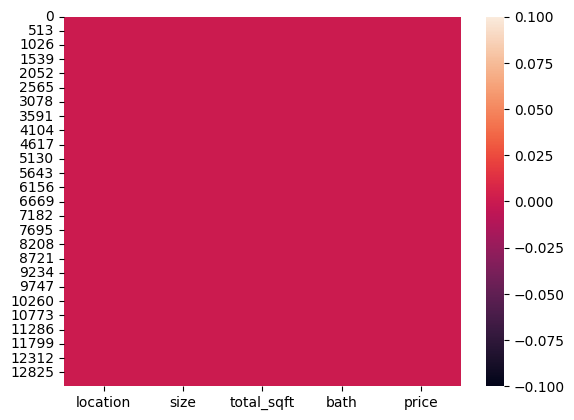

In [95]:
# plot heatmap to confirm there is no null values
import seaborn as sns
sns.heatmap(data.isnull())

In [96]:
# check statistical analysis 
data.describe()

,bath,price
count,13320.000000,13320.000000
mean,2.692610,112.565627
std,1.337777,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [97]:
data.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

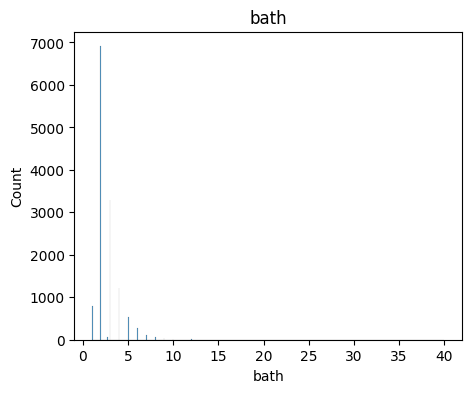

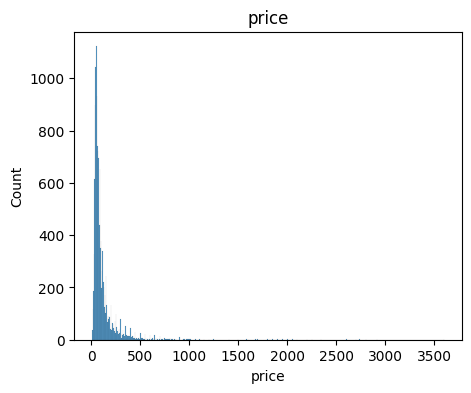

In [103]:
# plot countplot for each columns

for i in data.columns:
    if data[i].dtypes!="O":
        plt.figure(figsize=[5,4])
        sns.histplot(data[i])
        plt.title(i)
        plt.show()

In [105]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [139]:
X=data.iloc[:,:-1]
y=data["price"]

In [127]:
X.shape

(13320, 4)

In [140]:
y.shape

(13320,)

In [161]:
# import lybraries

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [145]:
l=LabelEncoder()
s=StandardScaler()

In [146]:
for i in X.columns:
    if X[i].dtypes=="O":
        X[i]=l.fit_transform(X[i])

In [147]:
X.head()

,location,size,total_sqft,bath
0,419,13,70,2.0
1,317,19,1288,5.0
2,1179,16,514,2.0
3,757,16,602,3.0
4,716,13,239,2.0


In [148]:
for i in X.columns:
    X[i]=s.fit_transform(X[[i]])

In [149]:
X.head()

,location,size,total_sqft,bath
0,-0.694925,-0.402027,-1.099138,-0.517751
1,-0.974332,0.944577,0.832727,1.724859
2,1.386932,0.271275,-0.394911,-0.517751
3,0.230954,0.271275,-0.255335,0.229786
4,0.118643,-0.402027,-0.831088,-0.517751


In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [157]:
model=SVR()

In [158]:
X_train.head()

,location,size,total_sqft,bath
3165,-1.103079,0.271275,-0.380636,0.229786
1216,1.302015,0.271275,-0.038040,0.229786
12447,-0.456607,-0.402027,-0.769230,-0.517751
8133,0.641847,0.271275,-0.551935,0.229786
6043,1.586900,0.271275,-0.588415,-0.517751


In [159]:
y_train.shape

(10656,)

In [162]:
# model trainnig 
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print("model score is :",model.score(X_train,y_train))
print()
print("r2 score :",r_score)
print()
print("mae :",mae)
print()
print("mse :",mse)

model score is : 0.2152771504648089

r2 score : 0.24367953644563212

mae : 42.44201216673427

mse : 14436.215504196749


This is the model training SVR regressior 